In [68]:
import numpy as np
import nbimporter
from compute_gradient_one_feat import compute_gradient_one_feature_vec
from cost_one_feature import compute_cost_one_feature_vec
import math

In [69]:
def compute_gradient_descent_one_feature(X,y,w_in,b_in,alpha,num_itrs,compute_cost,compute_gradient):
    m = X.shape[0]
    w = w_in
    b = b_in
    
    J_hist = []
    w_hist = []
    
    for i in range(num_itrs):
        dj_dw, dj_db = compute_gradient(X,y,w,b)
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)
        
        w_hist.append(w)
        J_hist.append(compute_cost(X,y,w,b))
        
        if i % (int(math.ceil(num_itrs/10))) == 0 :
            print(f" iteration {i}. cost {J_hist[-1]}, w = {w_hist[-1]}, b= {b}")
    
    return w,b,J_hist,w_hist

In [51]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression




In [53]:
df = pd.read_csv("train.csv")
# missing =  df[df["y"].isna()]

df = df.dropna(subset=["y"])
# missing =  df[df["y"].isna()]
# df.describe()

In [55]:
X_train,y_train = df["x"].to_numpy(),df["y"].to_numpy()
y_train.shape


(699,)

In [70]:
w_fin, b_fin, J_hist, w_history = compute_gradient_descent_one_feature(X_train,y_train,0,0,1e-05,100000,compute_cost_one_feature_vec,compute_gradient_one_feature_vec)

 iteration 0. cost 1560.6448394876934, w = 0.03335424584518538, b= 0.0004993986917045781
 iteration 10000. cost 3.9356578980303243, w = 0.9988705094732382, b= 0.011937673873345185
 iteration 20000. cost 3.9355707751137436, w = 0.9989147244194473, b= 0.008986421369354299
 iteration 30000. cost 3.935487912802998, w = 0.9989578446841512, b= 0.006108236499955398
 iteration 40000. cost 3.9354091027400235, w = 0.9989998973696695, b= 0.0033013102436504705
 iteration 50000. cost 3.9353341467561753, w = 0.9990409089073177, b= 0.0005638783670180406
 iteration 60000. cost 3.935262856373924, w = 0.9990809050740196, b= -0.0021057796841585483
 iteration 70000. cost 3.9351950523329298, w = 0.9991199110085106, b= -0.004709341866308516
 iteration 80000. cost 3.9351305641392926, w = 0.9991579512271346, b= -0.007248444592717328
 iteration 90000. cost 3.93506922963684, w = 0.9991950496392579, b= -0.00972468376205892


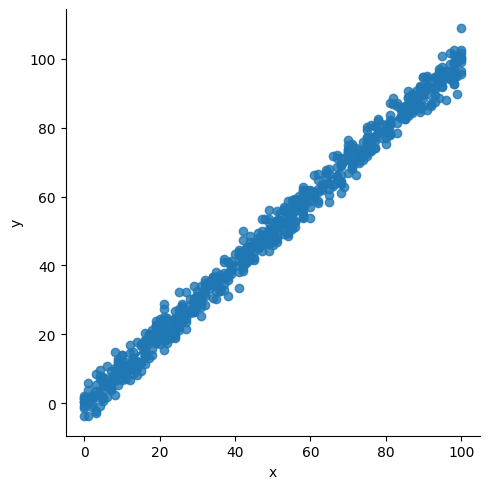

In [24]:
sns.lmplot(data= df, x="x", y = "y")

In [44]:
lm = LinearRegression()
lm.fit(X_train.reshape(-1,1),y_train.reshape(-1,1))

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
lm.coef_
X_train.reshape(-1,1).shape

(699, 1)

Text(0, 0.5, 'Predicted')

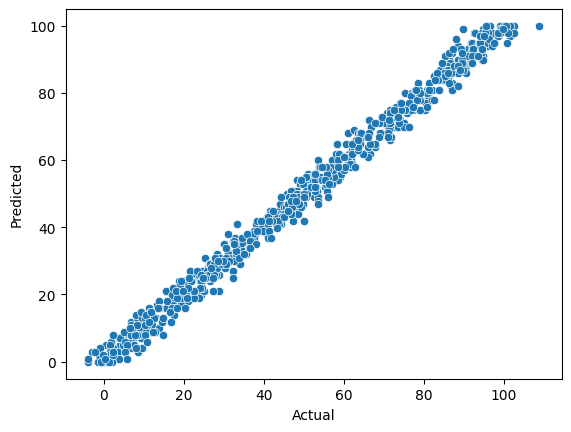

In [52]:
predictions = lm.predict(X_train.reshape(-1,1)).ravel()
predictions
sns.scatterplot(x=y_train, y=predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
# plt.show()